<a href="https://colab.research.google.com/github/MargaritaGorbunova/Artificial_Intelligence_Methods_Coursework/blob/main/Lab_03_Fashion_MNIST/fashion_mnist_cnn_mlp_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report

print("Библиотеки успешно импортированы")
print(f"TensorFlow версия: {tf.__version__}")

Библиотеки успешно импортированы
TensorFlow версия: 2.19.0


Загрузка и подготовка данных

In [2]:
# Загрузка Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Размер обучающей выборки: {x_train.shape}")
print(f"Размер тестовой выборки: {x_test.shape}")
print(f"Диапазон значений пикселей: [{x_train.min()}, {x_train.max()}]")

# Нормализация пикселей к диапазону [0;1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Изменение формы для CNN (добавление канала)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(f"\nФорма данных после преобразования:")
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Размер обучающей выборки: (60000, 28, 28)
Размер тестовой выборки: (10000, 28, 28)
Диапазон значений пикселей: [0, 255]

Форма данных после преобразования:
x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
y_train: (60000, 10)
y_test: (10000, 10)


Создание tf.data.Dataset для эффективной загрузки

In [3]:
batch_size = 32

# Создание Dataset для обучения
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_train = dataset_train.shuffle(10000)
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.AUTOTUNE)

# Создание Dataset для тестирования
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
dataset_test = dataset_test.batch(batch_size)
dataset_test = dataset_test.prefetch(tf.data.AUTOTUNE)

print(f"Размер батча: {batch_size}")
print(f"Количество батчей в обучении: {len(dataset_train)}")
print(f"Количество батчей в тесте: {len(dataset_test)}")

Размер батча: 32
Количество батчей в обучении: 1875
Количество батчей в тесте: 313


Сверточная нейронная сеть (CNN)

In [4]:
# Создание CNN модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Вывод архитектуры
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Обучение CNN модели

In [5]:
# Обучение модели
history_cnn = model.fit(dataset_train,
                       validation_data=dataset_test,
                       epochs=5,
                       verbose=1)

# Оценка на тестовой выборке
loss, accuracy = model.evaluate(dataset_test)
print(f'Точность CNN на тестовой выборке: {accuracy * 100:.2f}%')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.7187 - loss: 0.7680 - val_accuracy: 0.8593 - val_loss: 0.3834
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8583 - loss: 0.3968 - val_accuracy: 0.8863 - val_loss: 0.3143
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.8767 - loss: 0.3399 - val_accuracy: 0.8937 - val_loss: 0.2935
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8892 - loss: 0.3061 - val_accuracy: 0.9008 - val_loss: 0.2756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8970 - loss: 0.2790 - val_accuracy: 0.8938 - val_loss: 0.2881
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8951 - loss: 0.2911
Точность CNN на тестовой выборке: 89.38%


Оценка CNN модели

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


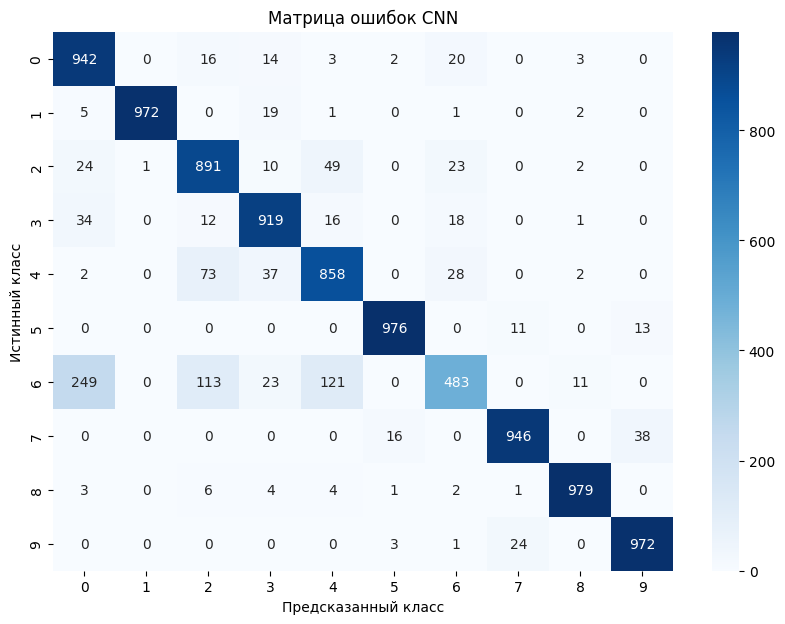

Отчет классификации для CNN:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1000
           1       1.00      0.97      0.99      1000
           2       0.80      0.89      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.84      0.48      0.61      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [6]:
# Предсказания на тестовой выборке
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Матрица ошибок для CNN
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок CNN')
plt.show()

# Классификационный отчет
print("Отчет классификации для CNN:")
print(classification_report(y_true, y_pred_classes))

Визуализация предсказаний CNN

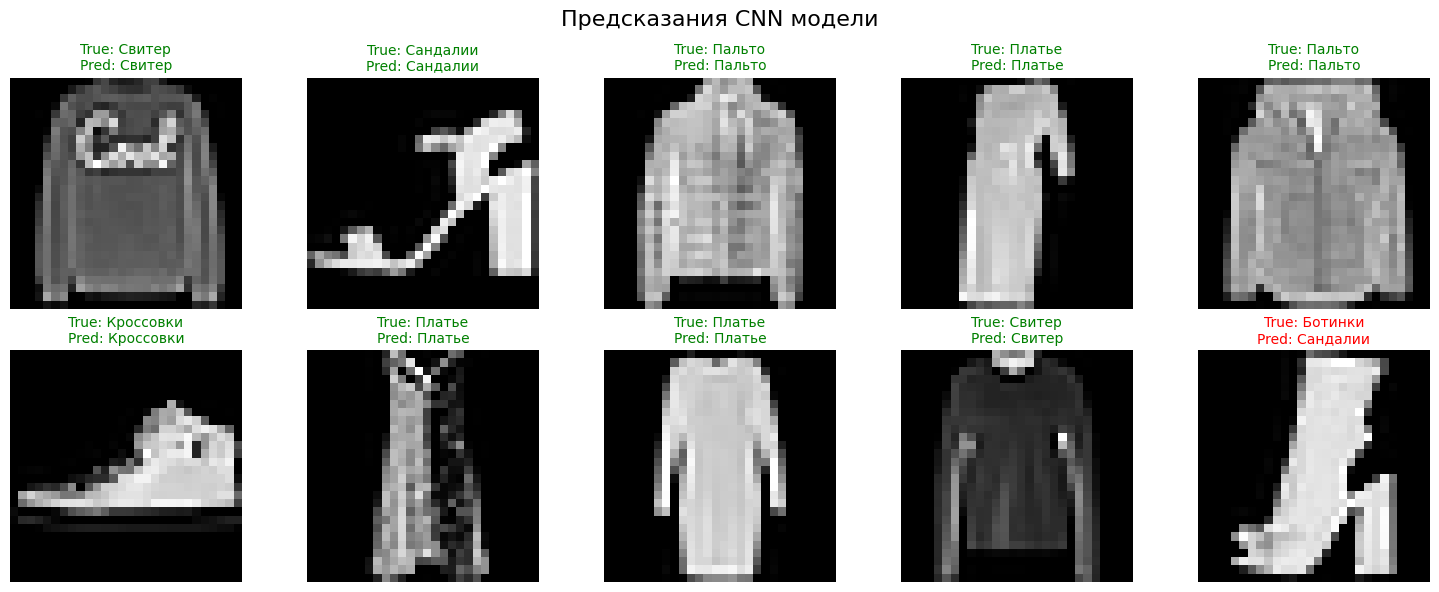

In [7]:
# Названия классов Fashion MNIST
class_names = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто',
               'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки']

# Выбор случайных изображений для визуализации
num_images = 10
indices = np.random.choice(x_test.shape[0], num_images, replace=False)

plt.figure(figsize=(15, 6))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    predicted_label = class_names[y_pred_classes[index]]
    true_label = class_names[y_true[index]]

    # Разный цвет для правильных/неправильных предсказаний
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f'True: {true_label}\nPred: {predicted_label}',
              fontsize=10, color=color)
    plt.axis('off')

plt.suptitle('Предсказания CNN модели', fontsize=16)
plt.tight_layout()
plt.show()

Многослойный перцептрон (MLP)

In [8]:
# Создание MLP модели
mlp_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
mlp_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Вывод архитектуры
mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Обучение MLP модели

In [9]:
# Обучение MLP модели
history_mlp = mlp_model.fit(dataset_train,
                           validation_data=dataset_test,
                           epochs=5,
                           verbose=1)

# Оценка на тестовой выборке
loss_mlp, accuracy_mlp = mlp_model.evaluate(dataset_test)
print(f'Точность MLP на тестовой выборке: {accuracy_mlp * 100:.2f}%')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7024 - loss: 0.8161 - val_accuracy: 0.8350 - val_loss: 0.4550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8218 - loss: 0.4911 - val_accuracy: 0.8555 - val_loss: 0.4113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8319 - loss: 0.4565 - val_accuracy: 0.8547 - val_loss: 0.4016
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8419 - loss: 0.4318 - val_accuracy: 0.8513 - val_loss: 0.4037
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8468 - loss: 0.4140 - val_accuracy: 0.8608 - val_loss: 0.3819
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.3753
Точность MLP на тестовой выборке: 86.08%


Оценка MLP модели

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


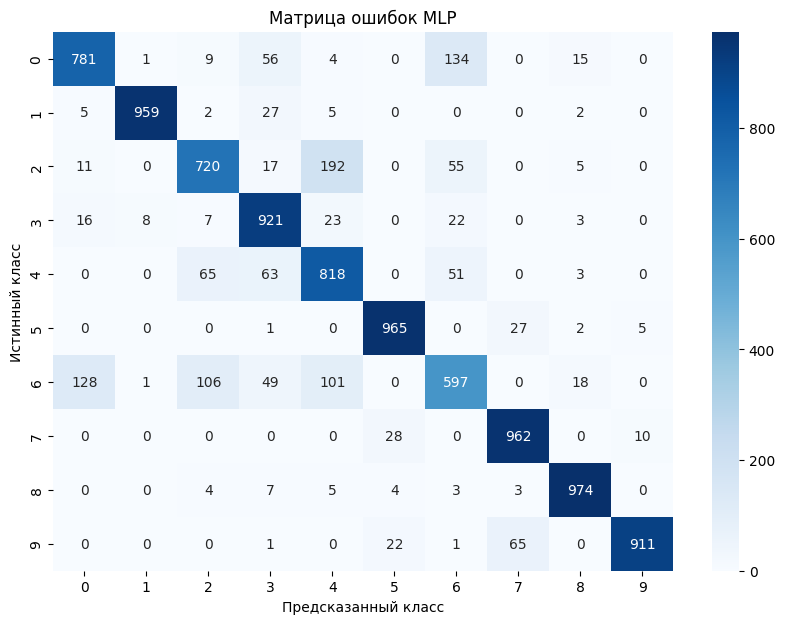

Отчет классификации для MLP:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.79      0.72      0.75      1000
           3       0.81      0.92      0.86      1000
           4       0.71      0.82      0.76      1000
           5       0.95      0.96      0.96      1000
           6       0.69      0.60      0.64      1000
           7       0.91      0.96      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.98      0.91      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [10]:
# Предсказания MLP модели
y_pred_mlp = mlp_model.predict(x_test)
y_pred_classes_mlp = np.argmax(y_pred_mlp, axis=1)

# Матрица ошибок для MLP
conf_matrix_mlp = confusion_matrix(y_true, y_pred_classes_mlp)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок MLP')
plt.show()

# Классификационный отчет
print("Отчет классификации для MLP:")
print(classification_report(y_true, y_pred_classes_mlp))

Визуализация предсказаний MLP


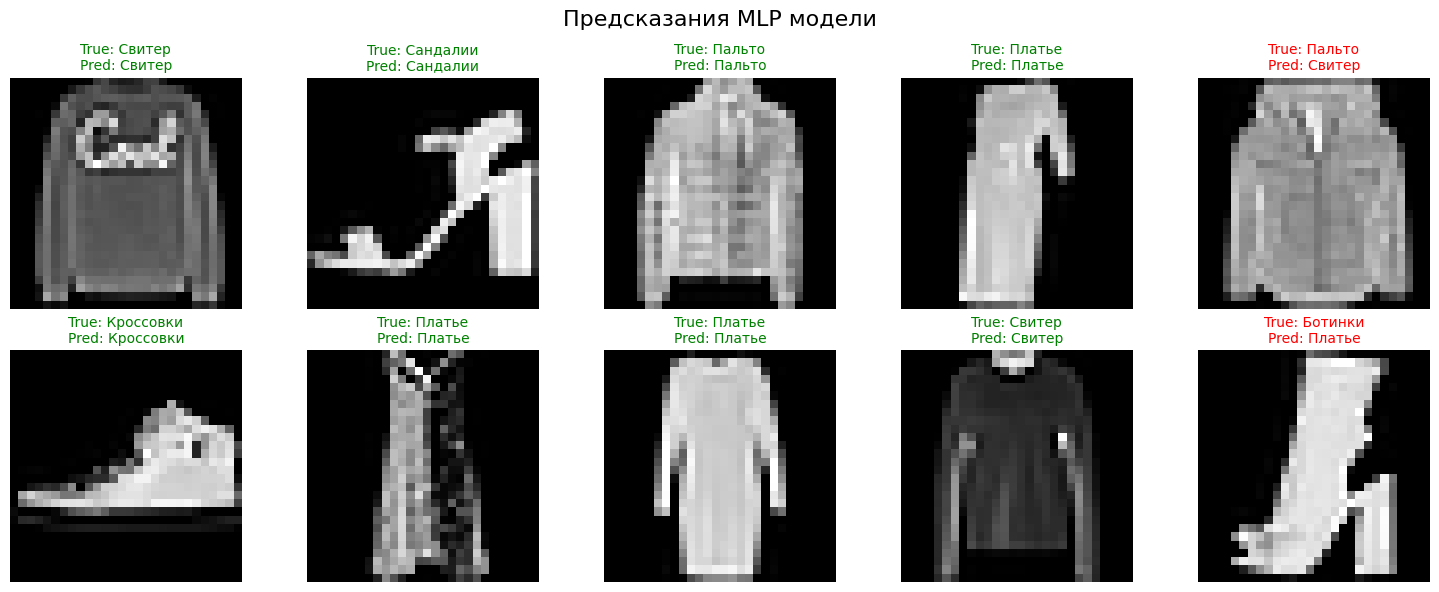

In [11]:
plt.figure(figsize=(15, 6))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    predicted_label_mlp = class_names[y_pred_classes_mlp[index]]
    true_label = class_names[y_true[index]]

    # Разный цвет для правильных/неправильных предсказаний
    color = 'green' if predicted_label_mlp == true_label else 'red'
    plt.title(f'True: {true_label}\nPred: {predicted_label_mlp}',
              fontsize=10, color=color)
    plt.axis('off')

plt.suptitle('Предсказания MLP модели', fontsize=16)
plt.tight_layout()
plt.show()

Сравнение моделей CNN и MLP

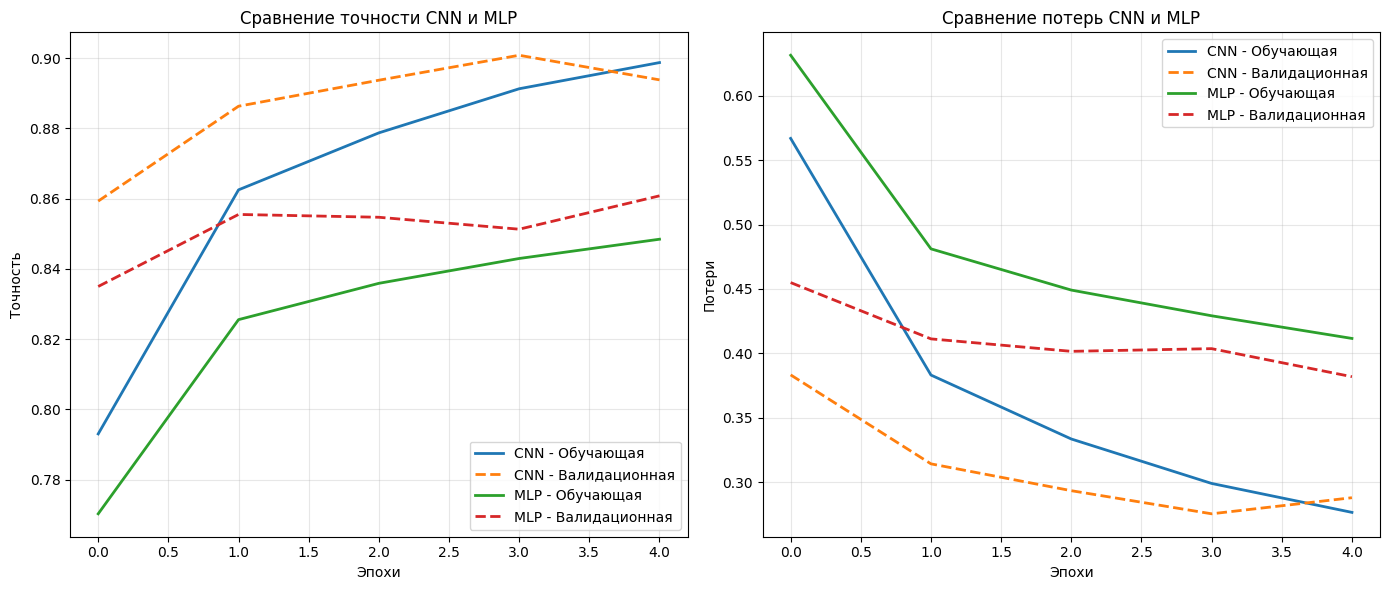

In [12]:
plt.figure(figsize=(14, 6))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN - Обучающая', linewidth=2)
plt.plot(history_cnn.history['val_accuracy'], label='CNN - Валидационная', linestyle='--', linewidth=2)
plt.plot(history_mlp.history['accuracy'], label='MLP - Обучающая', linewidth=2)
plt.plot(history_mlp.history['val_accuracy'], label='MLP - Валидационная', linestyle='--', linewidth=2)
plt.title('Сравнение точности CNN и MLP')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN - Обучающая', linewidth=2)
plt.plot(history_cnn.history['val_loss'], label='CNN - Валидационная', linestyle='--', linewidth=2)
plt.plot(history_mlp.history['loss'], label='MLP - Обучающая', linewidth=2)
plt.plot(history_mlp.history['val_loss'], label='MLP - Валидационная', linestyle='--', linewidth=2)
plt.title('Сравнение потерь CNN и MLP')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Итоговый отчет


In [13]:
print("="*60)
print("ИТОГОВЫЙ ОТЧЕТ")
print("="*60)

print(f"\nДатасет: Fashion MNIST")
print(f"Количество классов: 10")
print(f"Обучающих изображений: {x_train.shape[0]}")
print(f"Тестовых изображений: {x_test.shape[0]}")
print(f"Размер изображения: 28x28 пикселей")
print(f"Размер батча: {batch_size}")
print(f"Количество эпох: 5")

print(f"\nРезультаты моделей:")
print(f"CNN - Точность на тесте: {accuracy * 100:.2f}%")
print(f"MLP - Точность на тесте: {accuracy_mlp * 100:.2f}%")

print(f"\nУлучшение CNN относительно MLP: {(accuracy - accuracy_mlp) * 100:.2f}%")

# Сравнение количества параметров
cnn_params = model.count_params()
mlp_params = mlp_model.count_params()
print(f"\nКоличество параметров:")
print(f"CNN: {cnn_params:,}")
print(f"MLP: {mlp_params:,}")
print(f"Разница: {cnn_params - mlp_params:,} параметров")

print("\nВыводы:")
print("1. CNN показывает лучшую точность на задаче классификации изображений")
print("2. MLP обучается быстрее, но имеет более низкую точность")
print("3. CNN лучше улавливает пространственные зависимости в изображениях")
print("="*60)


ИТОГОВЫЙ ОТЧЕТ

Датасет: Fashion MNIST
Количество классов: 10
Обучающих изображений: 60000
Тестовых изображений: 10000
Размер изображения: 28x28 пикселей
Размер батча: 32
Количество эпох: 5

Результаты моделей:
CNN - Точность на тесте: 89.38%
MLP - Точность на тесте: 86.08%

Улучшение CNN относительно MLP: 3.30%

Количество параметров:
CNN: 225,034
MLP: 109,386
Разница: 115,648 параметров

Выводы:
1. CNN показывает лучшую точность на задаче классификации изображений
2. MLP обучается быстрее, но имеет более низкую точность
3. CNN лучше улавливает пространственные зависимости в изображениях
